In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
from google.colab.patches import cv2_imshow
os.chdir('/content/drive/MyDrive/computer_vision_class/week8/')

#try it by code ;)

In [2]:

def line_detection_non_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  for y in range(edge_height):
    for x in range(edge_width):
      if edge_image[y][x] != 0:
        edge_point = [y - edge_height_half, x - edge_width_half]
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
          theta = thetas[theta_idx]
          rho_idx = np.argmin(np.abs(rhos - rho))
          accumulator[rho_idx][theta_idx] += 1
          ys.append(rho)
          xs.append(theta)
        subplot3.plot(xs, ys, color="white", alpha=0.05)

  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x] > t_count:
        rho = rhos[y]
        theta = thetas[x]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x0 = (a * rho) + edge_width_half
        y0 = (b * rho) + edge_height_half
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        subplot3.plot([theta], [rho], marker='o', color="yellow")
        subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas



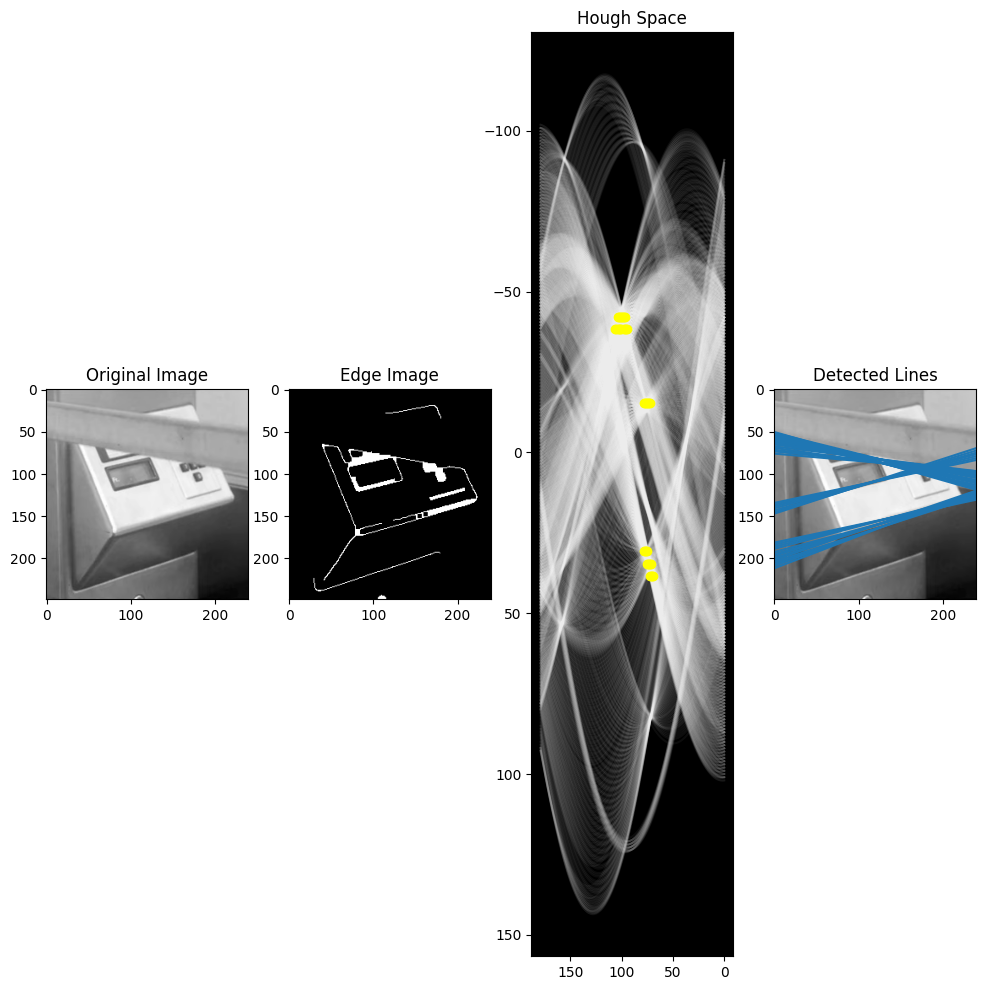

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.45833775e+02, -3.41991178e+02, -3.38148580e+02, -3.34305983e+02,
        -3.30463385e+02, -3.26620788e+02, -3.22778190e+02, -3.18935593e+02,
        -3.15092995e+02, -3.11250398e+02, -3.07407800e+02, -3.03565203e+02,
        -2.99722605e+02, -2.95880008e+02, -2.92037410e+02, -2.88194813e+02,
        -2.84352215e+02, -2.80509618e+02, -2.76667020e+02, -2.72824423e+02,
        -2.68981825e+02, -2.65139228e+02, -2.61296630e+02, -2.57454033e+02,
        -2.53611435e+02, -2.49768838e+02, -2.45926240e+02, -2.42083643e+02,
        -2.38241045e+02, -2.34398448e+02, -2.30555850e+02, -2.26713253e+02,
        -2.22870655e+02, -2.19028058e+02, -2.15185460e+02, -2.11342863e+02,
        -2.07500265e+02, -2.03657668e+02, -1.99815070e+02, -1.95972

In [8]:

image = cv2.imread(f"Sample1.PNG")
edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
edge_image = cv2.Canny(edge_image, 100, 200)
edge_image = cv2.dilate(
    edge_image,
    cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
    iterations=1
)
edge_image = cv2.erode(
    edge_image,
    cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
    iterations=1
)
line_detection_non_vectorized(image, edge_image)

#using opencv

**Standard and Probabilistic Hough Line Transform**

OpenCV implements **two kind **of Hough Line Transforms:

**a. The Standard Hough Transform**

It consists in pretty much what we just explained in the previous section. It gives you as result a vector of couples (θ,rθ)
In OpenCV it is implemented with the function HoughLines()

**b. The Probabilistic Hough Line Transform**

A more efficient implementation of the Hough Line Transform. It gives as output the extremes of the detected lines (x0,y0,x1,y1)
In OpenCV it is implemented with the function HoughLinesP()


Everything explained above is encapsulated in the OpenCV function, cv2.HoughLines(). It simply returns an array of (rho, theta) values. rho is measured in pixels and theta is measured in radians. First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before finding applying hough transform. Second and third parameters are rho and theta accuracies respectively. Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

try the following code on your own system

In [ ]:
import cv2
import numpy as np
import sys

def onTrackbarChange(max_slider):
	global img
	global dst
	global gray

	dst = np.copy(img)

	th1 = max_slider
	th2 = th1 * 0.4
	edges = cv2.Canny(img, th1, th2)

	# Apply probabilistic hough line transform
	lines = cv2.HoughLinesP(edges, 2, np.pi/180.0, 50, minLineLength=10, maxLineGap=100)

	# Draw lines on the detected points
	for line in lines:
		x1, y1, x2, y2 = line[0]
		cv2.line(dst, (x1, y1), (x2, y2), (0,0,255), 1)

	cv2.imshow("Result Image", dst)
	cv2.imshow("Edges",edges)



# Read image
img = cv2.imread('line-detection.jpg')

# Create a copy for later usage
dst = np.copy(img)

# Convert image to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create display windows
cv2.namedWindow("Edges")
cv2.namedWindow("Result Image")


# Initialize threshold value
initThresh = 500

# Maximum threshold value
maxThresh = 1000

cv2.createTrackbar("threshold", "Result Image", initThresh, maxThresh, onTrackbarChange)
onTrackbarChange(initThresh)

while True:
  key = cv2.waitKey(1)
  if key == 27:
    break

cv2.destroyAllWindows()


#active contour

**Active contours** by fitting snakes to features of images. Supports single and multichannel 2D images. Snakes can be periodic (for segmentation) or have fixed and/or free ends. The output snake has the same length as the input boundary. As the number of points is constant, make sure that the initial snake has enough points to capture the details of the final contour.

**parameters**:

**image**
(N, M) or (N, M, 3) ndarray
Input image.

**snake**
(N, 2) ndarray
Initial snake coordinates. For periodic boundary conditions, endpoints must not be duplicated.

**alpha**
float, optional
Snake length shape parameter. Higher values makes snake contract faster.

**beta**
float, optional
Snake smoothness shape parameter. Higher values makes snake smoother.

**w_line**
float, optional
Controls attraction to brightness. Use negative values to attract toward dark regions.

**w_edge**
float, optional
Controls attraction to edges. Use negative values to repel snake from edges.

**gamma**
float, optional
Explicit time stepping parameter.

**max_px_move**
float, optional
Maximum pixel distance to move per iteration.

**max_num_iter**
int, optional
Maximum iterations to optimize snake shape.

**convergence**
float, optional
Convergence criteria.

**boundary_condition**
string, optional
Boundary conditions for the contour. Can be one of ‘periodic’, ‘free’, ‘fixed’, ‘free-fixed’, or ‘fixed-free’. ‘periodic’ attaches the two ends of the snake, ‘fixed’ holds the end-points in place, and ‘free’ allows free movement of the ends. ‘fixed’ and ‘free’ can be combined by parsing ‘fixed-free’, ‘free-fixed’. Parsing ‘fixed-fixed’ or ‘free-free’ yields same behaviour as ‘fixed’ and ‘free’, respectively.
**Returns**:

**snake**
(N, 2) ndarray
Optimised snake, same shape as input parameter.


In [7]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color



A simple function to view the images

In [10]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7,7))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

Thresholding is a very basic segmentation process and will not work properly in a high-contrast image for which we will be needing more advanced tools.
For this section, we will use an example image which is freely available and attempt to segment the head portion using supervised segmentation techniques.## Supervised segmentation

For this section, we will use an example image of a girl, which is freely available and attempt to segment the head portion using supervised segmentation techniques.

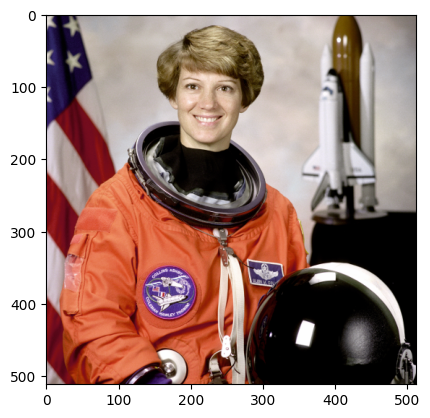

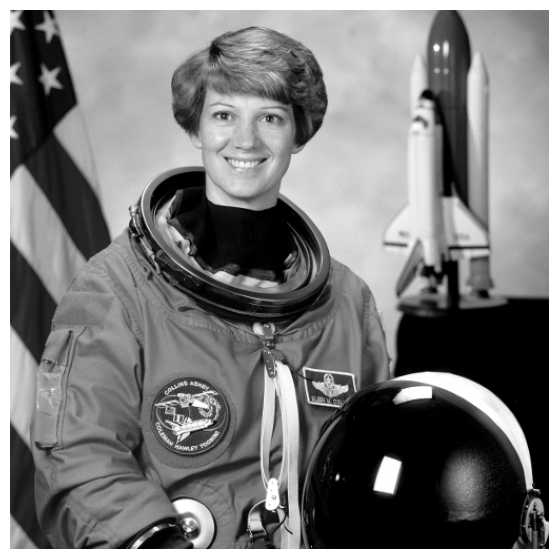

In [ ]:
image = data.astronaut()
plt.imshow(image)
image_gray = color.rgb2gray(image)
image_show(image_gray)

In [ ]:
s= np.linspace(0, 2*np.pi , 400)
r= 100+100*np.sin(s)
c= 220+100*np.cos(s)
init = np.array([r,c]).T

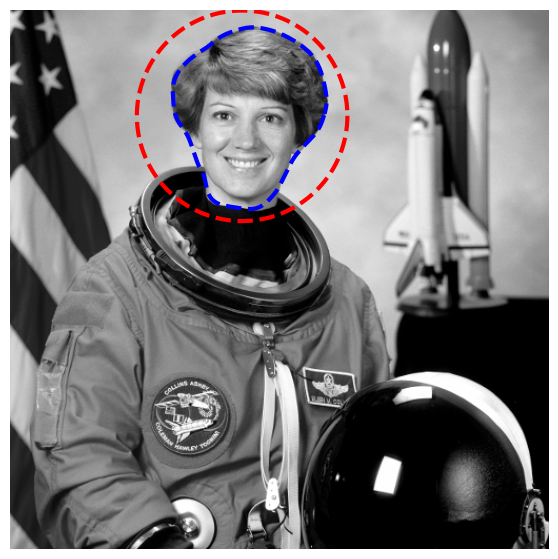

In [ ]:
snake = seg.active_contour(gaussian(image_gray , 3, preserve_range=False), init , alpha=0.1005, w_edge=0.4)
fig, ax = image_show(image_gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '--b', lw=3)


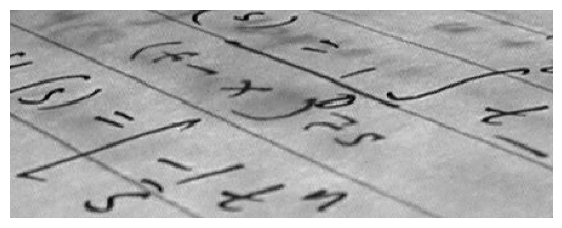

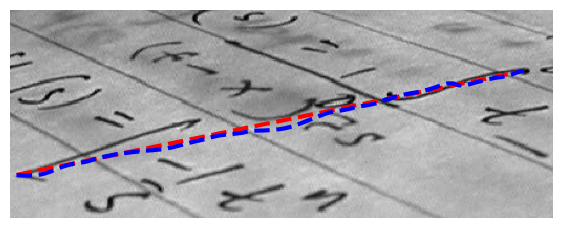

In [18]:
image= data.text()
image_show(image)
r= np.linspace(136, 50 , 100)
c= np.linspace(5, 424 , 100)


init = np.array([r,c]).T

snake = seg.active_contour(gaussian(image, 1,preserve_range=False), init, boundary_condition ='fixed',
                           alpha=0.1 , w_line = 5 , w_edge=0, gamma =0.1)
fig, ax = image_show(image)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '--b', lw=3)

